<a href="https://colab.research.google.com/github/ParitoshP702/BO_vs_RL_Pricing/blob/main/Boer_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
C = 10
S = 20

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def logit(p):
  return np.exp(p)/(1+np.exp(p))

In [ ]:
pl = 1
ph = 20

In [ ]:
epsilon = (ph-pl)/5

In [ ]:
alpha = 2
beta = -0.4

In [ ]:
import scipy
from scipy.optimize import fsolve

In [ ]:
def equations(params,*args):
  beta_0,beta_1 = params
  p_array,d_array = args
  # eqn1 = 0
  # eqn2 = 0
  # for i in range(len(p_array)):
  #   eqn1 += d_array[i] - logit(beta_0+beta_1*p_array[i])
  #   eqn2 += d_array[i]*p_array[i] - p_array[i]*logit(beta_0+beta_1*p_array[i])
  # return (eqn1,eqn2)
  p_array = np.array(p_array)
  d_array = np.array(d_array)
  eqn1 = np.sum(d_array - logit(beta_0+beta_1*p_array))
  eqn2 = np.sum(d_array*p_array - p_array*logit(beta_0+beta_1*p_array))
  # print(eqn1)
  # print(eqn2)
  return (eqn1,eqn2)



In [ ]:
def find_params(d_array,p_array,b1_init,b2_init):
  # b1_init = np.random.uniform(0,5)
  # b2_init = np.random.uniform(-5,0)
  b0,b1 = fsolve(equations,(b1_init,b2_init),args = (p_array,d_array))
  return b0,b1

In [ ]:
from scipy.optimize import minimize

In [ ]:
def value_optimize(p,*args):
  val1,val2,beta1,beta2 = args
  # print(args)
  return -((p-val1+val2)*logit(beta1+beta2*p)+val1)

In [ ]:
def value_iteration_matrix(beta1,beta2,pl,ph):
  value_mat = np.zeros(shape = (S+1,C+1))
  policy_mat = np.zeros(shape = (S,C))
  for row in range(S-1,-1,-1):
    for col in range(C-1,-1,-1):
      val = minimize(value_optimize,x0 = np.random.uniform(1,20),args = (value_mat[row+1,col],value_mat[row+1,col+1],beta1,beta2),bounds = [(pl,ph)])
      policy_mat[row,col] = val["x"]
      value_mat[row,col] = -val["fun"]
  return value_mat,policy_mat



In [ ]:
def check_for_exploration(p_array,p):
  for i in range(len(p_array)):
    if abs(p_array[i]-p)>= epsilon:
      return 0
    for j in range(i+1,len(p_array)):
      if abs(p_array[i] - p_array[j]) > epsilon:
        return 0
  return 1


In [ ]:
import random

In [ ]:
def episode(C,S,p_array,d_array,t):
  c = C
  s = 1
  returns = 0
  graph1 = []
  graph2 = []
  beta1 = np.random.uniform(0,5)
  beta2 = np.random.uniform(-5,0)
  while s<=S and c>0:
    beta1,beta2 = find_params(d_array,p_array,beta1,beta2)
    value_matrix,policy_matrix = value_iteration_matrix(beta1,beta2,pl,ph)
    p_ceqp = policy_matrix[s-1,C-c]
    # season = np.floor(t/S).astype(int)
    flag = check_for_exploration(p_array[t*S:],p_ceqp)
    if (flag == 0):
      if c == 1 or s == S:
        flag = 1
    p_new = 0
    if flag:
      if p_ceqp - 2*epsilon >=pl and p_ceqp + 2*epsilon<=ph:
        p_new = random.choice([p_ceqp-2*epsilon,p_ceqp + 2*epsilon])
      if p_ceqp - 2*epsilon >= pl and p_ceqp+2*epsilon>ph:
        p_new = p_ceqp - 2*epsilon
      if p_ceqp - 2*epsilon < pl and p_ceqp+2*epsilon<=ph:
        p_new = p_ceqp + 2*epsilon
    else:
      p_new = p_ceqp
    prob = logit(2-0.4*p_new)
    unif = np.random.uniform(0,1)
    if unif< prob:
      d_new = 1
      s+=1
      c-=1
      returns += p_new
    else:
      d_new =  0
      s+=1
      returns+=0
    p_array.append(p_new)
    d_array.append(d_new)
    graph1.append(beta1-2)
    graph2.append(beta2+0.4)
  # value_matrix,policy_matrix = value_iteration_matrix(beta1,beta2,pl,ph)
  # returns = value_matrix[0,0]
  return returns,p_array,d_array,graph1,graph2


In [ ]:
p1 = np.random.uniform(1,20)
p2 = np.random.uniform(1,20)
p_array = []
p_array.append(p1)
p_array.append(p2)
d_array = []
d1 = np.random.randint(0,2)
d2 = np.random.randint(0,2)
d_array.append(d1)
d_array.append(d2)

In [ ]:
# return_array = []

In [ ]:
p_array_init = p_array

In [ ]:
p_array_init

[5.909871517020762, 11.03557745057349]

In [ ]:
d_array_init = d_array

In [ ]:
d_array_init

[0, 0]

In [ ]:
from tqdm import tqdm

In [ ]:
final_graph1 = []
final_graph2 = []
beta1 = np.random.uniform(0,5)
beta2 = np.random.uniform(-5,0)
return_array_final = []
for times in tqdm(range(10)):
  return_array = []
  for t in range(100):
    returns,p_array,d_array,graph1,graph2 = episode(C,S,p_array,d_array,t)
    final_graph1.extend(graph1)
    final_graph2.extend(graph2)
    return_array.append(returns)
  return_array_final.append(return_array)
# return_array_final = np.mean(return_array_final,axis = 0)

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
<ipython-input-28-d103199c2d39>:2: RuntimeWarning: overflow encountered in exp
  return np.exp(p)/(1+np.exp(p))
<ipython-input-28-d103199c2d39>:2: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(p)/(1+np.exp(p))
 60%|██████    | 6/10 [54:50<36:33, 548.35s/it]


KeyboardInterrupt: ignored

In [ ]:
return_array_final

[[20.491305447515824,
  52.763337377917665,
  15.043026663420179,
  37.48968951835169,
  25.582495128242638,
  45.88821533538548,
  15.74353867661279,
  7.0,
  44.708131684452155,
  16.235066539010603,
  6.959889603750855,
  8.895862974971209,
  50.20431166538058,
  48.585296941016445,
  26.810551739381708,
  12.187229919255937,
  34.19049409446271,
  8.757719360037516,
  10.214845966119183,
  3.0,
  13.414036897738155,
  7.36951513394502,
  34.724390784607,
  35.36842819803445,
  11.833020881052748,
  40.67991976710166,
  12.159288679683913,
  50.78811174761236,
  2.0,
  10.191235822850276,
  9.600872503866714,
  50.1698589033576,
  44.312845303704776,
  6.403901528820078,
  47.78300542632002,
  47.24340423388165,
  44.50829458469113,
  30.57352017532582,
  35.060509950544805,
  28.352309946060757,
  38.424794806611494,
  44.06642380583689,
  16.596334826780875,
  47.54776503398608,
  10.302096224511372,
  31.409305586686838,
  39.551751580969565,
  20.51808864188149,
  26.71776095141

In [ ]:
return_array_final = np.mean(return_array_final,axis = 0)

In [ ]:
best_of_boer = []
for i in range(len(return_array_final)):
  best_val = np.min(47.79 - np.array(return_array_final[:i+1]))
  best_of_boer.append(np.max([0,best_val]))

In [ ]:
best_of_boer = np.array(best_of_boer)

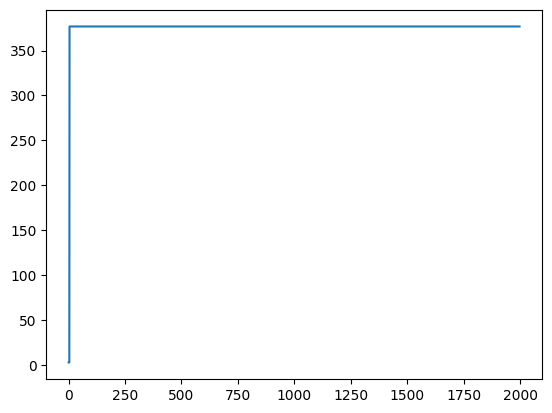

In [ ]:
import matplotlib.pyplot as plt
plt.plot(final_graph)
# plt.ylim(0,20)

In [ ]:
# p_array

In [ ]:
final_graph2

array([  -2.40329834,   -2.40329834,   -2.40329834, ..., -216.05185712,
       -216.05185712, -216.05185712])

In [ ]:
# return_array

In [ ]:
np.mean(return_array)

3.3022046529462328

In [ ]:
beta1  = 1.1488347077504757
beta2 = -3.373303371307001

In [ ]:
np.sum(np.array(d_array_init) - logit(beta1+beta2*np.array(p_array_init)))

7.433497258430979

In [ ]:
np.sum(np.array(d_array_init)*np.array(p_array_init) - np.array(p_array_init)*logit(beta1+beta2*np.array(p_array_init)))

43.95908270759471

In [ ]:
return_array_final


array([15.95657001, 23.37076924, 15.86983   , 16.34072047, 22.5692578 ,
       15.86521776, 17.27705188, 16.6193222 , 22.18297431, 21.6506932 ,
       13.58420826, 16.95973301, 14.71308592, 24.33883565, 15.42773467,
       18.4421732 , 19.44136913, 20.31812467, 17.26920003, 18.33645459,
       14.70847366, 17.30643172, 17.82929803, 21.83620327, 22.36732451,
       19.16984767, 12.6259253 , 20.92446564, 18.1122862 , 22.05465704,
       14.81926259, 16.35087574, 17.40348305, 20.78183431, 18.14416046,
       17.13712437, 16.1377045 , 20.93226863, 14.91455106, 19.21312036,
       17.45635584, 19.94771503, 16.44773736, 12.89805487, 19.46694066,
       15.96624702, 20.24852705, 23.69088834, 22.85051509, 21.00691237,
       19.4163119 , 16.38693438, 21.66294492, 22.79494522, 19.98812002,
       21.24474905, 20.23271318, 22.69563316, 22.00729335, 19.16370609,
       16.44967791, 20.32840981, 19.07201657, 20.12538329, 18.31293956,
       17.00523066, 13.04435208, 11.94198484, 22.33213819, 20.25

In [ ]:
v,p = value_iteration_matrix(3.350411758454949,-4.753596564151666,1,20)

In [ ]:
beta2

-216.45185711583915

In [ ]:
p

array([[ 7.90311881,  7.83979218, 16.73237078,  8.42836291,  7.8194832 ,
         1.        ,  5.59986209,  1.        , 13.99142716,  1.        ],
       [16.5730981 , 17.79554259, 10.02332685,  5.26709305,  5.78776463,
         7.26610828, 13.82593003,  4.92940844, 15.48339344,  1.        ],
       [16.39570909, 12.46063629,  5.28933834, 16.73231419, 14.63047615,
         1.        ,  6.58436525, 15.87047163,  1.        ,  9.80409544],
       [19.54666586,  7.59968013,  5.82675927,  5.78293651,  3.86778826,
         5.28244792, 13.2415289 ,  1.        , 16.96359723,  5.75096502],
       [10.46911499, 10.31359142, 19.97448502, 14.83191867, 12.82117708,
        14.98172367, 18.08778367, 18.53019438,  6.61516646,  6.77592714],
       [ 8.16742422, 19.82891208,  6.76757489,  4.15564791,  1.        ,
        15.11923256,  3.97471495, 17.07902424,  7.28324589, 17.54034531],
       [13.34413602,  6.93327539, 13.52914824, 14.13397389, 13.3916182 ,
        12.34422022, 15.49408993, 18.32410982

In [ ]:
value,policy = value_iteration_matrix(2,-0.4,1,20)

In [ ]:
value

array([[47.79329627, 46.31944766, 44.30453284, 41.69240735, 38.43433829,
        34.48017897, 29.76759884, 24.20641372, 17.64898388,  9.81517647,
         0.        ],
       [45.87807132, 44.62715714, 42.8439282 , 40.46093223, 37.42221238,
        33.67374393, 29.15162232, 23.76550596, 17.36838792,  9.68115829,
         0.        ],
       [43.86487158, 42.83665791, 41.29266652, 39.15087284, 36.34538656,
        32.81652968, 28.49784863, 23.29841041, 17.07172553,  9.53975971,
         0.        ],
       [41.7534199 , 40.94258403, 39.64275608, 37.75374222, 35.19619746,
        31.90230113, 27.80161616, 22.80194263, 16.75709184,  9.39013322,
         0.        ],
       [39.54684226, 38.94129991, 37.88632979, 36.26023231, 33.96583787,
        30.92373684, 27.05740231, 22.27232218, 16.42222917,  9.23127808,
         0.        ],
       [37.25263308, 36.83208592, 36.01636149, 34.66040666, 32.64424212,
        29.8722108 , 26.25861621, 21.7050203 , 16.06443607,  9.06200136,
         0.   

In [ ]:
policy

array([[ 5.66613722,  5.97548728,  6.34357608,  6.77023165,  7.26059082,
         7.82854378,  8.50209598,  9.33785742, 10.46782432, 12.31502869],
       [ 5.54141707,  5.83449274,  6.19305824,  6.61553656,  7.10569876,
         7.67589225,  8.35320692,  9.19378028, 10.32860676, 12.1811619 ],
       [ 5.4223137 ,  5.69390179,  6.03892372,  6.45467626,  6.94312892,
         7.51487162,  8.19589708,  9.0413492 , 10.18159331, 12.03976206],
       [ 5.31210558,  5.55627717,  5.88256271,  6.28791277,  6.77247712,
         7.34485969,  8.02932478,  8.87976724, 10.02574248, 11.89012769],
       [ 5.21476077,  5.42493881,  5.72592259,  6.11599119,  6.59362305,
         7.16509789,  7.85235139,  8.70787598,  9.86036538, 11.73126915],
       [ 5.1340293 ,  5.30427207,  5.57221181,  5.94036722,  6.40669883,
         6.974866  ,  7.66405519,  8.52463061,  9.68356736, 11.56200243],
       [ 5.07303082,  5.19929472,  5.4257453 ,  5.7634817 ,  6.21230128,
         6.77355126,  7.46309546,  8.32829645

## Using Bayesian Optimisation for the same problem

In [ ]:
pip install gpytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.0/173.0 kB 18.6 MB/s eta 0:00:00


In [ ]:
import gpytorch

In [ ]:
import torch

In [ ]:
import numpy as np

In [ ]:
import math

In [ ]:
def generate_price(mean,std):
  price = np.random.normal(mean,std)
  price = np.arctan(price)
  price = (price+math.pi/2)/math.pi
  price = price*(ph-pl)+pl
  return price

In [ ]:
def func(x,theta1,theta2,theta3,theta4):
  c = x[0]
  s = x[1]
  y = []
  # for i in range(len(c)):
  y =  c*theta1+s*theta2+theta3*c*s+theta4
  # y = np.array(y)
  return y

In [ ]:
# np.ones(200)

mean = c*theta1+s*theta2+theta3
std = abs(theta1*theta2/theta3)

In [ ]:
x1 = []
x2 = []
y  = []
for s in range(S):
  for c in range(C):
    x1.append(C-c)
    x2.append(s+1)
    y.append(policy[s,c])
x = list([x1,x2])
x = np.array(x)
y = np.array(y)

NameError: ignored

In [ ]:
import scipy
from scipy.optimize import curve_fit

In [ ]:
theta1,theta2,theta3,theta4 = curve_fit(func,xdata = x,ydata = y)[0]

In [ ]:
theta1,theta2,theta3,theta4

(-0.8447361840081151,
 -0.3553473601491637,
 0.034924481963413134,
 12.885717078946518)

In [ ]:
# calc_return(theta1,theta2,theta3,theta4)

In [ ]:
final_pol_mat = []
for s in range(0,S):
  listi = []
  for c in range(0,C):
    listi.append((C-c)*theta1+(s+1)*theta2+theta3*(C-c)*(s+1)+theta4)
  final_pol_mat.append(listi)

In [ ]:
final_pol_mat = np.array(final_pol_mat)

In [ ]:
final_pol_mat

array([[ 4.4322527 ,  5.2420644 ,  6.0518761 ,  6.8616878 ,  7.67149951,
         8.48131121,  9.29112291, 10.10093461, 10.91074631, 11.72055802],
       [ 4.42615016,  5.20103738,  5.9759246 ,  6.75081182,  7.52569904,
         8.30058626,  9.07547348,  9.8503607 , 10.62524792, 11.40013514],
       [ 4.42004762,  5.16001036,  5.89997309,  6.63993583,  7.37989857,
         8.11986131,  8.85982405,  9.59978678, 10.33974952, 11.07971226],
       [ 4.41394508,  5.11898333,  5.82402159,  6.52905985,  7.2340981 ,
         7.93913636,  8.64417461,  9.34921287, 10.05425113, 10.75928938],
       [ 4.40784254,  5.07795631,  5.74807008,  6.41818386,  7.08829763,
         7.75841141,  8.42852518,  9.09863896,  9.76875273, 10.4388665 ],
       [ 4.40174   ,  5.03692929,  5.67211858,  6.30730787,  6.94249716,
         7.57768646,  8.21287575,  8.84806504,  9.48325433, 10.11844363],
       [ 4.39563746,  4.99590227,  5.59616708,  6.19643189,  6.7966967 ,
         7.39696151,  7.99722632,  8.59749113

In [ ]:
policy

array([[ 5.66613722,  5.97548728,  6.34357608,  6.77023165,  7.26059082,
         7.82854378,  8.50209598,  9.33785742, 10.46782432, 12.31502869],
       [ 5.54141707,  5.83449274,  6.19305824,  6.61553656,  7.10569876,
         7.67589225,  8.35320692,  9.19378028, 10.32860676, 12.1811619 ],
       [ 5.4223137 ,  5.69390179,  6.03892372,  6.45467626,  6.94312892,
         7.51487162,  8.19589708,  9.0413492 , 10.18159331, 12.03976206],
       [ 5.31210558,  5.55627717,  5.88256271,  6.28791277,  6.77247712,
         7.34485969,  8.02932478,  8.87976724, 10.02574248, 11.89012769],
       [ 5.21476077,  5.42493881,  5.72592259,  6.11599119,  6.59362305,
         7.16509789,  7.85235139,  8.70787598,  9.86036538, 11.73126915],
       [ 5.1340293 ,  5.30427207,  5.57221181,  5.94036722,  6.40669883,
         6.974866  ,  7.66405519,  8.52463061,  9.68356736, 11.56200243],
       [ 5.07303082,  5.19929472,  5.4257453 ,  5.7634817 ,  6.21230128,
         6.77355126,  7.46309546,  8.32829645

In [ ]:
def black_box(theta1,theta2,theta3,theta4):
  returns = []
  s = 1
  c = C
  while s<=S and c>=0:
    price = c*theta1+s*theta2+c*s*theta3+theta4
    if price < pl:
      price = pl
    if price > ph:
      price = ph
    probs = logit(2-0.4*price)
    unif = np.random.uniform(0,1)
    if unif < probs:
      returns.append(price)
      s+=1
      c-=1
    else:
      returns.append(0)
      s+=1
    # if unif < probs:
    #   price = 0.5
    #   dprob = alpha+beta*price
    #   un = np.random.uniform(0,1)
    #   if un < dprob:
    #     returns.append(price)
    #     s+=1
    #     c-=1
    #   else:
    #     returns.append(0)
    #     s+=1
    # else:
    #   price = 0.7
    #   dprob = alpha+beta*price
    #   un = np.random.uniform(0,1)
    #   if un < dprob:
    #     returns.append(price)
    #     s+=1
    #     c-=1
    #   else:
    #     returns.append(0)
    #     s+=1
  final_return = np.sum(np.array(returns))
  return final_return



In [ ]:
def calc_return(theta1,theta2,theta3,theta4):
  runs = 10
  ret = []
  for i in range(runs):
    ret.append(black_box(theta1,theta2,theta3,theta4))
  return np.mean(ret)


In [ ]:
import scipy
from scipy.stats import norm

In [ ]:
def acquisition(model,likelihood,train_x,xsamples):
  train_x = torch.tensor(train_x)
  Xsamples = torch.tensor(xsamples)
  model.double()
  yhat = model(train_x).mean.detach().numpy()
  best = max(yhat)
  likelihood.eval()
  model.eval()
  with torch.no_grad():
    f_preds = model(Xsamples)
  mu = (f_preds.mean).detach().numpy()
  std = ((f_preds.variance).detach().numpy())**0.5
  probs = (mu-best)*norm.cdf((mu-best)/(std+1e-9)) + std*norm.pdf((mu-best)/(std+1e-9))
  return probs


In [ ]:
def opt_acquisition(model,likelihood,train_x):
  theta1 = np.random.uniform(low = -1,high = 0,size = 10)
  theta2 = np.random.uniform(low = -1,high = 0,size = 10)
  theta3 = np.random.uniform(low = 0,high = 1,size = 10)
  theta4 = np.random.uniform(low = 5,high = 15,size = 10)
  x_samp = []
  for i in range(len(theta1)):
    x_samp.append([theta1[i],theta2[i],theta3[i],theta4[i]])
  x_samp = np.array(x_samp)
  scores = acquisition(model,likelihood,train_x,x_samp)
  ix = np.argmax(scores)
  return x_samp[ix]

In [ ]:
theta1_init = np.random.uniform(low = -1,high = 0,size = 1)
theta2_init = np.random.uniform(low = -1,high = 0,size = 1)
theta3_init = np.random.uniform(low = -1,high = 0,size = 1)
theta4_init = np.random.uniform(low = 5,high = 15,size = 1)
train_x = [[theta1_init[0],theta2_init[0],theta3_init[0],theta4_init[0]]]
train_y = calc_return(theta1_init,theta2_init,theta3_init,theta4_init)

In [ ]:
train_y

11.0

In [ ]:
train_x = torch.tensor(train_x)
train_y = torch.tensor([train_y])

In [ ]:
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_x, train_y, likelihood)

In [ ]:
def tune_hyperparameter(train_x,train_y,model,likelihood):
      # print(train_x)
      # print(train_y)
      train_x = torch.tensor(train_x)
      train_y = torch.tensor(train_y)
      likelihood = gpytorch.likelihoods.GaussianLikelihood()
      model = ExactGPModel(train_x, train_y, likelihood)
      model.train()
      likelihood.train()

      optimizer = torch.optim.Adam(model.parameters(),lr = 0.1)

      mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood,model)

      training_iter = 100

      for i in range(training_iter):
        ##zero greadients from previous iterations

        optimizer.zero_grad()
        ##output from model

        output = model(train_x)

        ##calculate loss and backprop gradients

        loss = -mll(output,train_y)
        # print(loss)

        loss.backward()

        optimizer.step()
      return model,likelihood


In [ ]:
model,likelihood = tune_hyperparameter(train_x,train_y,model,likelihood)

<ipython-input-26-4a0c86ccf141>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_x = torch.tensor(train_x)
<ipython-input-26-4a0c86ccf141>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_y = torch.tensor(train_y)


In [ ]:
train_x = train_x.numpy()
train_y = train_y.numpy()

In [ ]:
from tqdm import tqdm

In [ ]:
for i in tqdm(range(200)):
  point = opt_acquisition(model,likelihood,train_x)
  true_val = calc_return(point[0],point[1],point[2],point[3])
  train_x = np.vstack((train_x,[point]))
  train_y = np.hstack((train_y,[true_val]))
  model,likelihood = tune_hyperparameter(train_x,train_y,model,likelihood)

100%|██████████| 200/200 [01:43<00:00,  1.93it/s]


In [ ]:
train_y

array([11.        ,  7.85033372, 47.0281345 ,  0.        , 22.2290813 ,
       11.49853364,  9.59377524,  2.92428706,  0.        , 36.27798743,
        4.88215745, 11.1887099 , 11.07309003, 24.76431132, 30.57286804,
        4.31408293, 19.5275737 ,  9.40338386,  8.46140872,  6.09956379,
        0.        ,  2.        ,  5.27998334, 13.45499594,  0.        ,
        2.39407019,  9.74129768, 16.85360249, 17.57651296,  3.21060484,
        2.        ,  3.2512794 ,  4.351856  , 33.94031027,  8.84309706,
        7.71450807,  4.06477556,  2.79604526,  9.93893958, 39.26548918,
        3.10011446, 33.48420239, 16.91481921, 30.8483924 , 12.28283484,
       13.52737546,  9.62399461, 34.35196813,  0.        ,  8.63446144,
       22.79250374,  5.65466201,  6.73666181, 33.49757403, 20.5655524 ,
        4.76022614, 11.76678403,  9.74228496, 11.        , 16.29316888,
        6.03518882, 38.51909108, 43.47454247,  2.33468241, 10.58191381,
       26.24964303,  3.77709604, 29.34643325,  4.77719144, 27.96

In [ ]:
best_till_now_BO = []
for i in range(len(train_y)):
  best_val = np.min(47.79 - np.array(train_y[:i+1]))
  best_till_now_BO.append(np.max([0,best_val]))




In [ ]:
best_till_now_BO = np.array(best_till_now_BO)

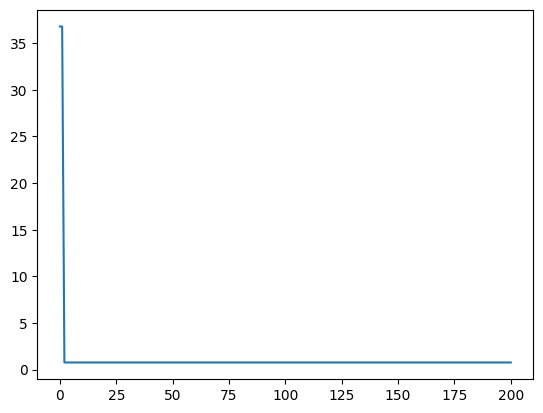

In [ ]:
plt.plot(best_till_now_BO)

In [ ]:
import pickle
file_path = open("Best_till_now_BO.txt","wb")
pickle.dump(best_till_now_BO,file_path)

In [ ]:
best_till_now_BO

array([36.79     , 36.79     ,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618

## DDPG




In [ ]:
import pickle

In [ ]:
import torch
from torch import nn

In [ ]:
def calc_returns_ddpg(policy):
  C = 10.
  S = 20.
  c,s = C,1.
  # reward_array = []
  # action_array = []
  # state_array = []
  returns = 0
  while s<=S and c>0:
    # state_array.append([c,s])
    price = policy(torch.tensor([c,s])) + torch.tensor(np.random.normal(0,1))
    if price < torch.tensor(1):
      price = torch.tensor(1)
    elif price > torch.tensor(20):
      price = torch.tensor(20)
    price = price.detach().numpy()
    # action_array.append(price)
    demand_prob = np.exp(-price)/(1+np.exp(-price))
    print(f"The demand probability is{demand_prob}")
    unif = np.random.uniform(0,1)
    if unif<demand_prob:
      # reward_array.append(price)
      returns += price
      s += 1
      c -= 1
    else:
      # reward_array.append(0)
      s+=1
  return returns

In [ ]:
theta_target_array = torch.load("/content/theta_target_array_ddpg.txt")

In [ ]:
best_till_now_ddpg = []
for i in range(len(theta_target_array)):
  theta_target = theta_target_array[i]
  policy = nn.Sequential(nn.Linear(2,64),
                         nn.ReLU(),
                         nn.Linear(64,32),
                         nn.ReLU(),
                         nn.Linear(32,1),
                         nn.ReLU()
                         )
  n = 0
  for p in policy.parameters():
    p.data = theta_target[n]
    n += 1
  return_array = []
  for i in range(10):
    return_array.append(calc_returns_ddpg(policy))
  returns = np.mean(return_array)
  print(returns)
  val = np.max([0,47.79 - returns])
  if len(best_till_now_ddpg) == 0:
    best_till_now_ddpg.append(val)
  else:
    mini = np.min(best_till_now_ddpg)
    val = np.min([mini,val])
    best_till_now_ddpg.append(val)



Streaming output truncated to the last 5000 lines.
The demand probability is0.2689414213699951
The demand probability is[0.17855304]
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is[0.26107004]
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213

In [ ]:
plt.plot(best_till_now_ddpg)
plt.xlabel("Budet")
plt.ylabel("Regret")
plt.title("DDPG performance on logit demand")
plt.savefig("DDPG.png")

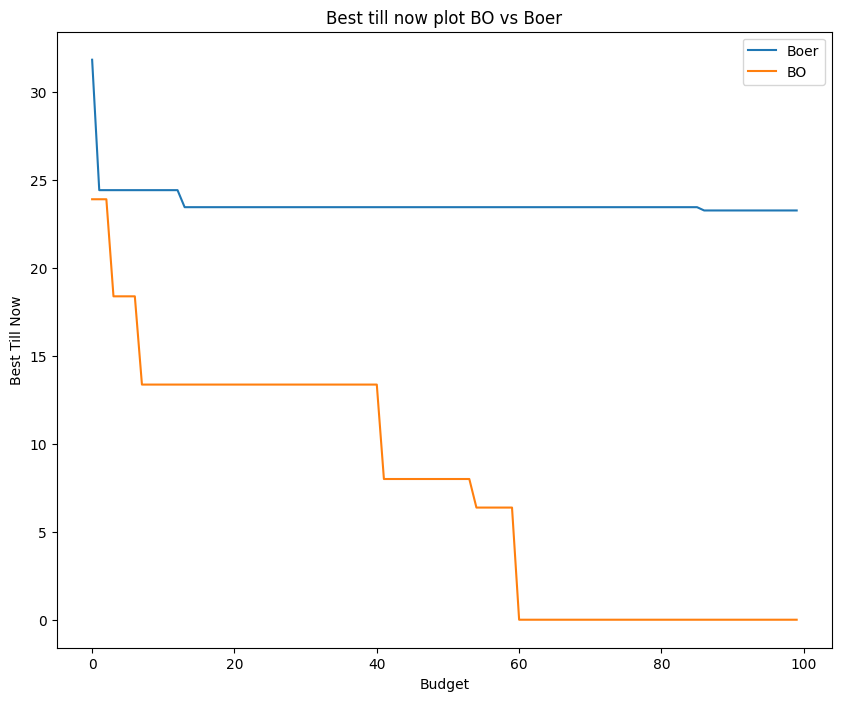

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(best_of_boer,label = "Boer")
plt.plot(best_till_now[:100],label = "BO")
plt.xlabel("Budget")
plt.ylabel("Best Till Now")
plt.title("Best till now plot BO vs Boer")
plt.legend()
plt.savefig("Boer_vs_BO.png")

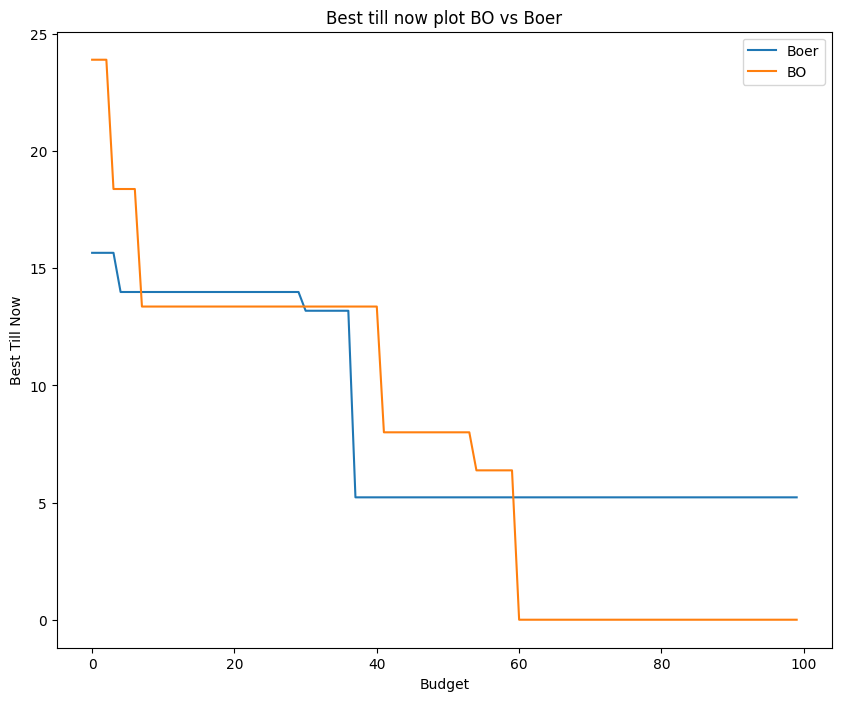

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(best_of_boer,label = "Boer")
plt.plot(best_till_now[:100],label = "BO")
plt.xlabel("Budget")
plt.ylabel("Best Till Now")
plt.title("Best till now plot BO vs Boer")
plt.legend()
plt.savefig("Boer_vs_BO.png")